# Imports

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import datasets as dt
from sklearn import model_selection as ms
from sklearn import metrics as mt
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Loading Data

In [69]:
X, y = dt.make_regression(n_samples=5000,
                          n_features=4,
                          random_state=0)

X_train, X_test, y_train, y_test = ms.train_test_split(X, y)

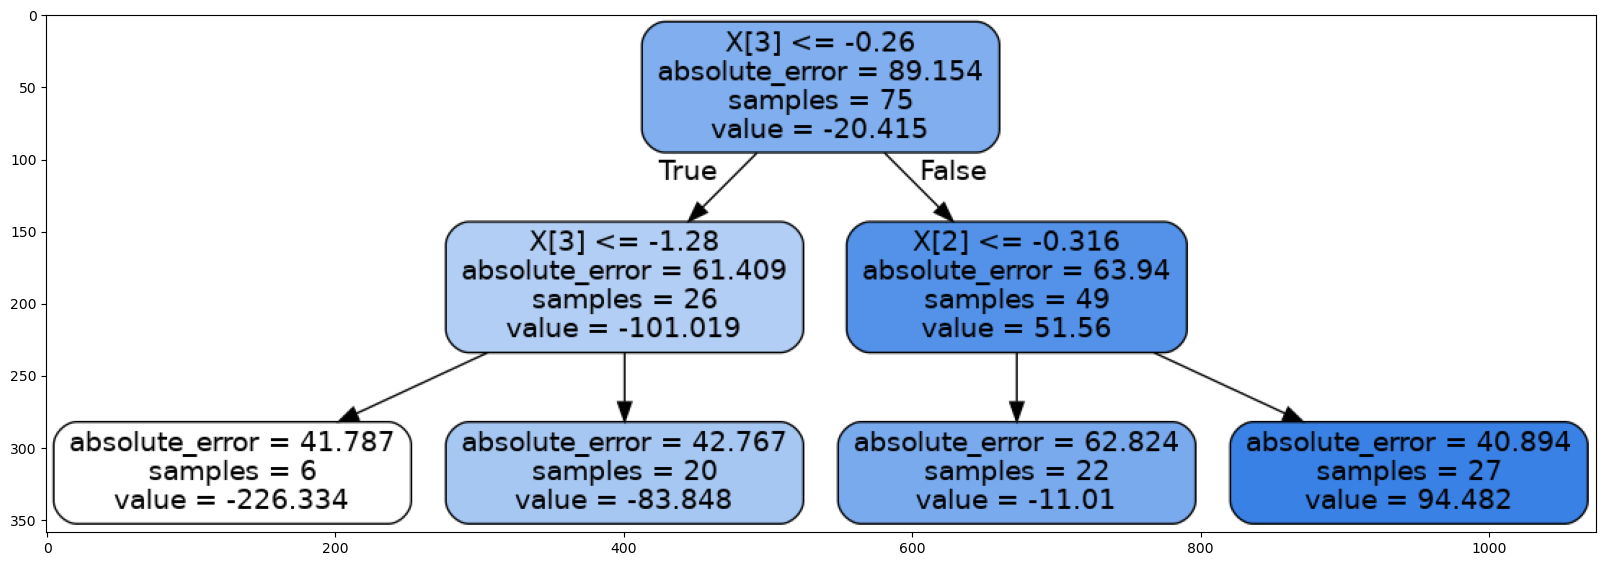

In [38]:
# define
dtr_model = DecisionTreeRegressor(max_depth=2, criterion='absolute_error')
# fit
dtr_model.fit(X_train, y_train)
# predict
y_pred = dtr_model.predict(X_test)

# Export tree
export_graphviz(dtr_model,
                out_file='tree_reg.dot',
                #feature_names=iris.feature_names,
                #class_names=iris.target_names,
                rounded=True,
                filled=True)

!dot -Tpng tree_reg.dot -o tree_reg.png

img = cv2.imread('tree_reg.png')
plt.figure(figsize=(20, 20))
plt.imshow(img);

In [70]:
max_depth_values = np.arange(2, 40, 1)
rmse_list = []
for i in max_depth_values:    
    # define
    dtr_model = DecisionTreeRegressor(max_depth=i, criterion='absolute_error')
    # fit
    dtr_model.fit(X_train, y_train)
    # predict
    y_pred = dtr_model.predict(X_test)

    mse = mt.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

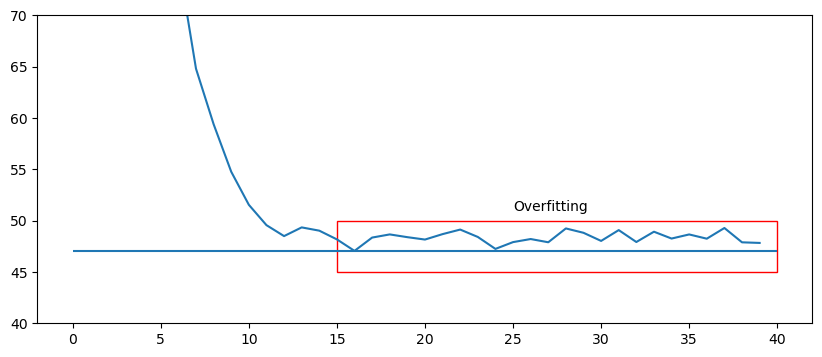

In [71]:
plt.figure(figsize=(10,4))
plt.plot(max_depth_values, rmse_list, '-')
plt.hlines(min(rmse_list), 0, 40)
plt.ylim(40, 70)
left, bottom, width, height = (15, 45, 25, 5)
rect=mpatches.Rectangle((left,bottom),width,height, 
                        fill=False,
                        color="red",
                        linewidth=1)
plt.text(25, 51, 'Overfitting')
plt.gca().add_patch(rect)